In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# df = pd.read_csv('Used_Bikes.csv')
# df

df = pd.read_csv('NepaliData.csv')
df



,bike_name,price,city,kms_driven,age,power,brand,owner
0,TVS Star City,35000,Dhanusa,17654,3,110,TVS,1
1,Royal Enfield Classic,119900,Kathmandu,11000,4,350,Royal Enfield,1
2,Triumph Daytona 675R,600000,Kathmandu,110,8,675,Triumph,1
3,TVS Apache RTR,65000,Kaski,16329,4,180,TVS,1
4,Yamaha FZ S,80000,Kaski,10000,3,150,Yamaha,1
...,...,...,...,...,...,...,...,...
32550,Hero Passion Pro,39000,Kathmandu,22000,4,100,Hero,1
32551,TVS Apache RTR,30000,Mahottari,6639,9,180,TVS,1
32552,Bajaj Avenger Street,60000,Kathmandu,20373,6,220,Bajaj,1
32553,Hero Super Splendor,15600,Sunsari,84186,16,125,Hero,1


In [3]:
df2=df.copy()

In [4]:
df['age'].astype(int)


0         3
1         4
2         8
3         4
4         3
         ..
32550     4
32551     9
32552     6
32553    16
32554    13
Name: age, Length: 32555, dtype: int32

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32555 entries, 0 to 32554
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32555 non-null  object
 1   price       32555 non-null  int64 
 2   city        32555 non-null  object
 3   kms_driven  32555 non-null  int64 
 4   age         32555 non-null  int64 
 5   power       32555 non-null  int64 
 6   brand       32555 non-null  object
 7   owner       32555 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.0+ MB


In [6]:
df["bike_name"]=df["bike_name"].str.split(" ").str.slice(0,3).str.join(' ')
df["bike_name"]

0                TVS Star City
1        Royal Enfield Classic
2         Triumph Daytona 675R
3               TVS Apache RTR
4                  Yamaha FZ S
                 ...          
32550         Hero Passion Pro
32551           TVS Apache RTR
32552     Bajaj Avenger Street
32553      Hero Super Splendor
32554       Bajaj Pulsar 150cc
Name: bike_name, Length: 32555, dtype: object

In [7]:
df=df.reset_index(drop= True)
df

,bike_name,price,city,kms_driven,age,power,brand,owner
0,TVS Star City,35000,Dhanusa,17654,3,110,TVS,1
1,Royal Enfield Classic,119900,Kathmandu,11000,4,350,Royal Enfield,1
2,Triumph Daytona 675R,600000,Kathmandu,110,8,675,Triumph,1
3,TVS Apache RTR,65000,Kaski,16329,4,180,TVS,1
4,Yamaha FZ S,80000,Kaski,10000,3,150,Yamaha,1
...,...,...,...,...,...,...,...,...
32550,Hero Passion Pro,39000,Kathmandu,22000,4,100,Hero,1
32551,TVS Apache RTR,30000,Mahottari,6639,9,180,TVS,1
32552,Bajaj Avenger Street,60000,Kathmandu,20373,6,220,Bajaj,1
32553,Hero Super Splendor,15600,Sunsari,84186,16,125,Hero,1


In [8]:
df.describe()

,price,kms_driven,age,power,owner
count,3.255500e+04,32555.000000,32555.000000,32555.000000,32555.000000
mean,6.826924e+04,26352.374413,8.051083,213.489356,1.086070
std,9.078026e+04,22219.025843,4.031760,134.441127,0.295303
min,4.400000e+03,1.000000,1.000000,100.000000,1.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000,1.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000,1.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000,1.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000,4.000000


In [9]:
# df.to_csv('NewCleanedData.csv')

In [10]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred_continuous = regressor.predict(X_test)


# Model

In [13]:
X= df.drop(columns="price")
y=df['price']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [16]:
ohe= OneHotEncoder()
ohe.fit(X[['bike_name','city','brand']])

OneHotEncoder()

In [17]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['bike_name','city','brand']), remainder="passthrough")

In [18]:
lr=LinearRegression()

In [19]:
pipe=make_pipeline(column_trans,lr)

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BMW F750 GS', 'BMW G 310', 'BMW S 1000', 'Bajaj  Pulsar',
       'Bajaj Avenger 150cc', 'Bajaj Avenger 180cc',
       'Bajaj Avenger 200cc', 'Bajaj Avenger 220cc',
       'Bajaj Avenger Cruise', 'Bajaj Avenger Street',
       'Bajaj Boxer AT100', 'Bajaj Boxer BM150', 'B...
       'Tanahun', 'Taplejung', 'Tehrathum', 'Udayapur', 'West Rukum'],
      dtype=object),
                                                                            array(['BMW', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
       'Honda', 'Hyosung', 'Ideal', 'Jawa', 'KTM', 'Kawasaki', 'LML',
       'MV', 'Mahindra', 'Rajdoot', 'Royal Enfield', 'Suzuki', 'TVS',
       'Tehrathuman', 'Triumph', 'Yamaha', 'Yezdi'], dtype=object)]),
                                                  ['bike_name', 'city',
                                                   'brand'])])),
                ('linearregression', LinearRegression())])

In [21]:
y_pred=pipe.predict(X_test)
y_pred

array([ 47015.26230622,  22533.09596143,  87772.73067063, ...,
       101770.60151867, 192522.56208941,  75413.13515226])

In [22]:
r2_score(y_test,y_pred)

0.903894510253349

In [23]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2 , random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
    
    

In [24]:
np.argmax(scores)

846

In [25]:
scores[np.argmax(scores)]


0.9463066079750805

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2 , random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9463066079750805

In [27]:
# import pickle 
# pickle.dump(pipe,open('LinearRegressionModel_Nepali.pkl','wb'))   

In [28]:
predictions=pipe.predict(pd.DataFrame([['TVS Apache RTR','Sunsari',2000,4,500,'TVS',2]],columns=['bike_name','city','kms_driven','age','power','brand','owner']))
predictions

array([335709.88895961])

In [29]:
# # # Load from .pkl
# with open("LinearRegressionModel_Nepali.pkl", "rb") as pkl_file:
#     model = pickle.load(pkl_file)

In [30]:
# import pickle
# from joblib import dump
# from joblib import load



# # # Save to .joblib
# dump(model, "LinearRegressionModel_Nepali.joblib")


In [31]:
import numpy as np
mse = np.mean((y_test - y_pred)*2)


In [32]:
rmse = np.sqrt(mse)


C:\Users\USER\AppData\Local\Temp\ipykernel_1412\2446843345.py:1: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(mse)


In [33]:
tolerance = 500  # for instance, $500
accurate_predictions = np.abs(y_pred - y_test) <= tolerance
accuracy = np.mean(accurate_predictions)


In [34]:
threshold = 500

# Calculate absolute differences between actual and predicted values
differences = np.abs(y_pred - y_test)

# Count how many differences are below the threshold
correct_predictions = np.sum(differences <= threshold)

# Calculate accuracy
accuracy = correct_predictions


In [35]:
# MOdel Multiple Linear Regression
import numpy as np

class MultiLR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculate coefficients using the normal equation
        theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept_, self.coef_])



In [36]:
class MLR2:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        
        betas = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        
    def predict(self, X_test):
        X_test_bias = np.insert(X_test, 0, 1, axis=1)
        
        # Predict y values using dot product of X_test_bias and betas
        y_pred = np.dot(X_test_bias, np.insert(self.coef_, 0, self.intercept_))
        return y_pred

In [37]:
df_encoded = pd.get_dummies(df2, columns=["bike_name", "city", "brand"])

In [38]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("price", axis=1)  # Drop the target variable
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = MultiLR()
model.fit(X_train.values, y_train.values)

# Making predictions
y_pred = model.predict(X_test.values)

In [40]:
data = {
    'bike_name': ["Royal Enfield Classic"],  # Replace with the name of a bike
    'city': ["Kaski"],           # Replace with a city name
    'brand': ["Royal Enfield"],         # Replace with a brand name
    'kms_driven': [2900],           # Replace with the kms driven
    'age': [1],                     # Replace with the age
    'power': [350],                 # Replace with the power
    'owner': [1]                    # Replace with the owner value
}

df = pd.DataFrame(data)

In [41]:
df_encoded = pd.get_dummies(df)

In [42]:
def process_dataframe(df, model_columns):
    
    df = df.reindex(columns=model_columns, fill_value=0)
    return df

model_columns = X_train.columns.tolist()
df_processed = process_dataframe(df_encoded, model_columns)

In [43]:
prediction = model.predict(df_processed.values)
print(f"Predicted Price: {prediction[0]}")

Predicted Price: 128231.00853281148


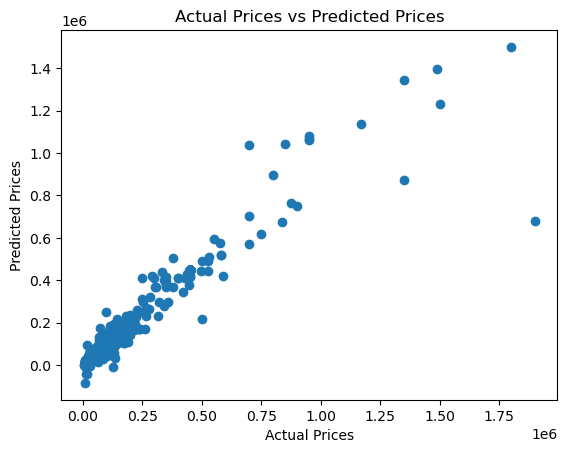

In [44]:
import matplotlib.pyplot as plt

# Assuming y_test are the actual values and y_pred are your model's predictions
y_pred = model.predict(X_test.values)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

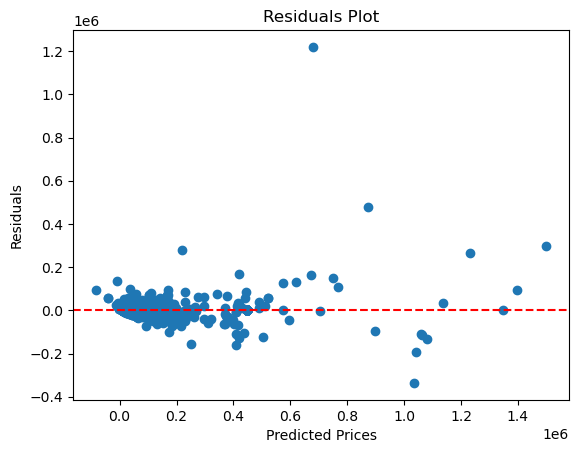

In [45]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

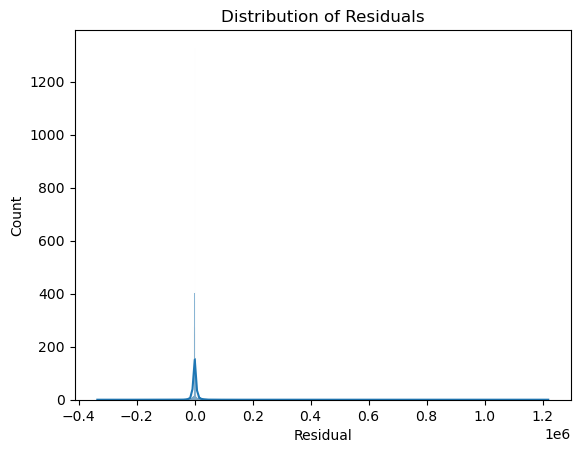

In [46]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.show()

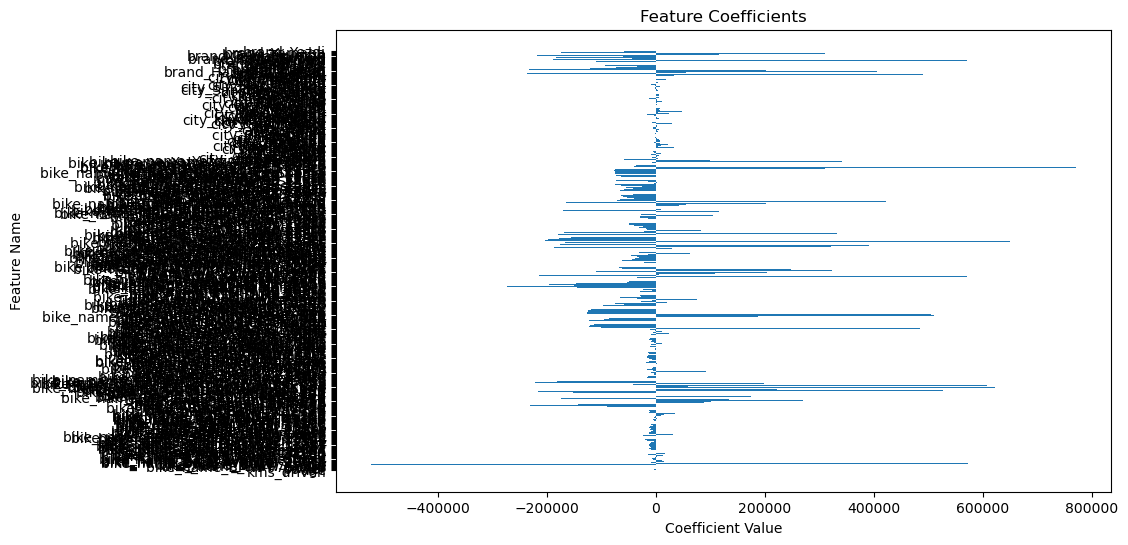

In [47]:
coefficients = model.coef_
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Coefficients')
plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [49]:
# import pickle 
# pickle.dump(pipe,open('LinearRegressionModel_Nepali.pkl','wb'))   

In [50]:
# # # Load from .pkl
# with open("LinearRegressionModel_Nepali.pkl", "rb") as pkl_file:
#     model = pickle.load(pkl_file)

In [51]:
# import pickle
# from joblib import dump
# from joblib import load



# # # Save to .joblib
# dump(model, "LinearRegressionModel_Nepali.joblib")
